In [5]:
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('../../data/processed/sleep_cycle_productivity_cleaned.csv')

C:\Users\haa\AppData\Local\Temp\ipykernel_16820\154918823.py:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(x) and x.cat.ordered and \
C:\Users\haa\AppData\Local\Temp\ipykernel_16820\154918823.py:32: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif (pd.api.types.is_categorical_dtype(x) and x.cat.ordered) or \
C:\Users\haa\AppData\Local\Temp\ipykernel_16820\154918823.py:33: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  (pd.api.types.is_categorical_dtype(y) and y.cat.ordered):
C:\Users\haa\AppData\Local\Temp\ipykernel_16820\154918823.py:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

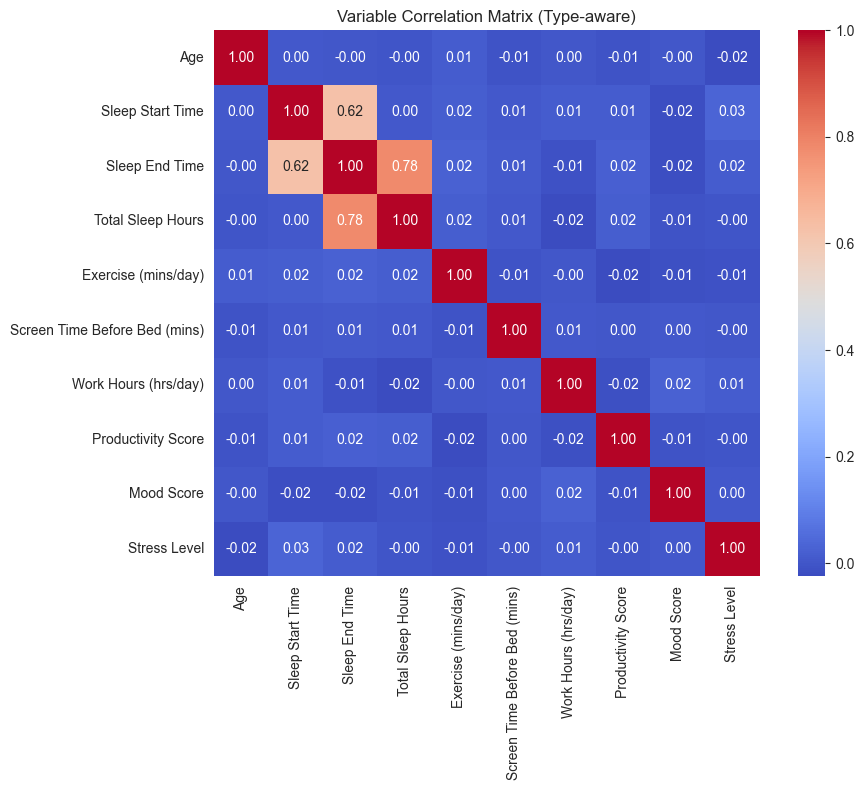

In [6]:
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)
ordinal_cols = ['Sleep Quality', 'Productivity Score', 'Mood Score', 'Stress Level']
for col in ordinal_cols:
    df[col] = df[col].astype(ordered_score)


df['Weekday'] = df['Weekday'].astype('category')
df['Gender'] = df['Gender'].astype('category')


exclude_cols = ['Date', 'Sleep Quality', 'Weekday', 'Gender']

explanatory_vars = [col for col in df.columns if col not in exclude_cols]

corr_matrix = pd.DataFrame(index=explanatory_vars, columns=explanatory_vars)

for var1 in explanatory_vars:
    for var2 in explanatory_vars:
        x = df[var1]
        y = df[var2]

        # 둘 다 순서형: Spearman
        if pd.api.types.is_categorical_dtype(x) and x.cat.ordered and \
           pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
            coef, _ = stats.spearmanr(x.cat.codes, y.cat.codes)

        # 둘 다 수치형: Pearson
        elif pd.api.types.is_numeric_dtype(x) and pd.api.types.is_numeric_dtype(y):
            coef, _ = stats.pearsonr(x, y)

        # 하나 순서형: Spearman
        elif (pd.api.types.is_categorical_dtype(x) and x.cat.ordered) or \
             (pd.api.types.is_categorical_dtype(y) and y.cat.ordered):
            x_vals = x.cat.codes if pd.api.types.is_categorical_dtype(x) else x
            y_vals = y.cat.codes if pd.api.types.is_categorical_dtype(y) else y
            coef, _ = stats.spearmanr(x_vals, y_vals)

        else:
            coef = np.nan

        corr_matrix.loc[var1, var2] = coef


corr_matrix = corr_matrix.astype(float)



plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Variable Correlation Matrix (Type-aware)")
plt.tight_layout()
plt.show()
